# Chapter 5 - Basic Math and Statistics

In [76]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy import stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

np.set_printoptions(precision=2)

## Segment 1 - Using NumPy to perform arithmetic operations on data

### Creating arrays

In [4]:
np.set_printoptions(precision=2)

#### Creating arrays using a list

In [66]:
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [6]:
b = np.array([[10,20,20],[40,50,60]])
b

array([[10, 20, 20],
       [40, 50, 60]])

#### Creating arrays via assignment

In [7]:
np.random.seed(25)
c = 36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [8]:
d = np.arange(1, 35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

### Performing arthimetic on arrays

In [9]:
print(a*10)
print(c + a)
print(c-a)
print(c*a)
print(c/a)

[10 20 30 40 50 60]
[  9.22  38.97 -27.23 -17.28 -29.45  -2.  ]
[  7.22  34.97 -33.23 -25.28 -39.45 -14.  ]
[   8.22   73.94  -90.68  -85.13 -172.24  -48.02]
[  8.22  18.48 -10.08  -5.32  -6.89  -1.33]


## Segment 2 - Multiplying matrices and basic linear algebra

In [16]:
aa = np.array([[2.,4.,6.],[1.,3.,5.],[10.,20.,30.]])
aa

array([[ 2.,  4.,  6.],
       [ 1.,  3.,  5.],
       [10., 20., 30.]])

In [14]:
bb = np.array([[0.,1.,2.],[3.,4.,5.],[6.,7.,8.]])
bb

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [11]:
aa*bb

array([[  0.,   4.,  12.],
       [  3.,  12.,  25.],
       [ 60., 140., 240.]])

In [12]:
np.dot(aa,bb)

array([[ 48.,  60.,  72.],
       [ 39.,  48.,  57.],
       [240., 300., 360.]])

## Segment 3 - Generating summary statistics using pandas and scipy

In [22]:
address = 'data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Looking at summary statistics that decribe a variable's numeric values

In [42]:
selected_columns = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars_info = cars[selected_columns]

cars_info.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [44]:
df = cars_info

sum_values = df.sum()
max_values = df.max()
index_of_max = df.idxmax()
min_values = df.min()
index_of_min = df.idxmin()
average = df.mean()
median = df.median()
std = df.std()
var = df.var()
# Create a new DataFrame that combines max values and index labels
df_describe = pd.DataFrame({
    'sum_value': sum_values, 
    'max_value': max_values, 
    'idmax': index_of_max,
    'min_value': min_values, 
    'idmin': index_of_min,
    'average': average,
    'median': median,
    'std': std,
    'var': var
    }
)

df_describe


,sum_value,max_value,idmax,min_value,idmin,average,median,std,var
mpg,642.900,33.900,19,10.400,14,20.090625,19.200,6.026948,36.324103
cyl,198.000,8.000,4,4.000,2,6.187500,6.000,1.785922,3.189516
disp,7383.100,472.000,14,71.100,19,230.721875,196.300,123.938694,15360.799829
hp,4694.000,335.000,30,52.000,18,146.687500,123.000,68.562868,4700.866935
drat,115.090,4.930,18,2.760,5,3.596563,3.695,0.534679,0.285881
wt,102.952,5.424,15,1.513,27,3.217250,3.325,0.978457,0.957379
qsec,571.160,22.900,8,14.500,28,17.848750,17.710,1.786943,3.193166
vs,14.000,1.000,2,0.000,0,0.437500,0.000,0.504016,0.254032
am,13.000,1.000,0,0.000,3,0.406250,0.000,0.498991,0.248992
gear,118.000,5.000,26,3.000,3,3.687500,4.000,0.737804,0.544355


In [35]:
mpg = cars.mpg
mpg.idxmax()

19

### Looking at summary statistics that describe variable distribution

In [45]:
gear = cars.gear
gear.value_counts()

gear
3    15
4    12
5     5
Name: count, dtype: int64

In [46]:
cyl = cars.cyl
cyl.value_counts()

cyl
8    14
4    11
6     7
Name: count, dtype: int64

## Segment 4 - Summarizing categorical data using pandas

In [48]:
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.index = cars.car_names

cars.head(15)

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [49]:
carb = cars.carb
carb.value_counts()

carb
4    10
2    10
1     7
3     3
6     1
8     1
Name: count, dtype: int64

In [50]:
cars_cat = cars[['cyl','vs','am','gear','carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [51]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

cyl                                                 vs            ...  \
     count      mean       std  min  25%  50%  75%  max count      mean  ...   
gear                                                                     ...   
3     15.0  7.466667  1.187234  4.0  8.0  8.0  8.0  8.0  15.0  0.200000  ...   
4     12.0  4.666667  0.984732  4.0  4.0  4.0  6.0  6.0  12.0  0.833333  ...   
5      5.0  6.000000  2.000000  4.0  4.0  6.0  8.0  8.0   5.0  0.200000  ...   

       am       carb                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     0.0  0.0  15.0  2.666667  1.175139  1.0  2.0  3.0  4.0  4.0  
4     1.0  1.0  12.0  2.333333  1.302678  1.0  1.0  2.0  4.0  4.0  
5     1.0  1.0   5.0  4.400000  2.607681  2.0  2.0  4.0  6.0  8.0  

[3 rows x 32 columns]

In [52]:
### Transforming variables to categorical data type
cars['group'] = pd.Series(cars.gear, dtype="category")
cars['group'].dtypes
cars['group'].value_counts()

group
3    15
4    12
5     5
Name: count, dtype: int64

In [53]:
### Describing categorical data with crosstabs
pd.crosstab(cars['am'], cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


## Segment 5 - Starting with parametric methods in pandas and scipy

In [59]:
from pylab import rcParams
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize'] = 8,4
sb.set(style="whitegrid")

/Users/kaledinaoa/Documents/Projects/DATA-ANALYST/num-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


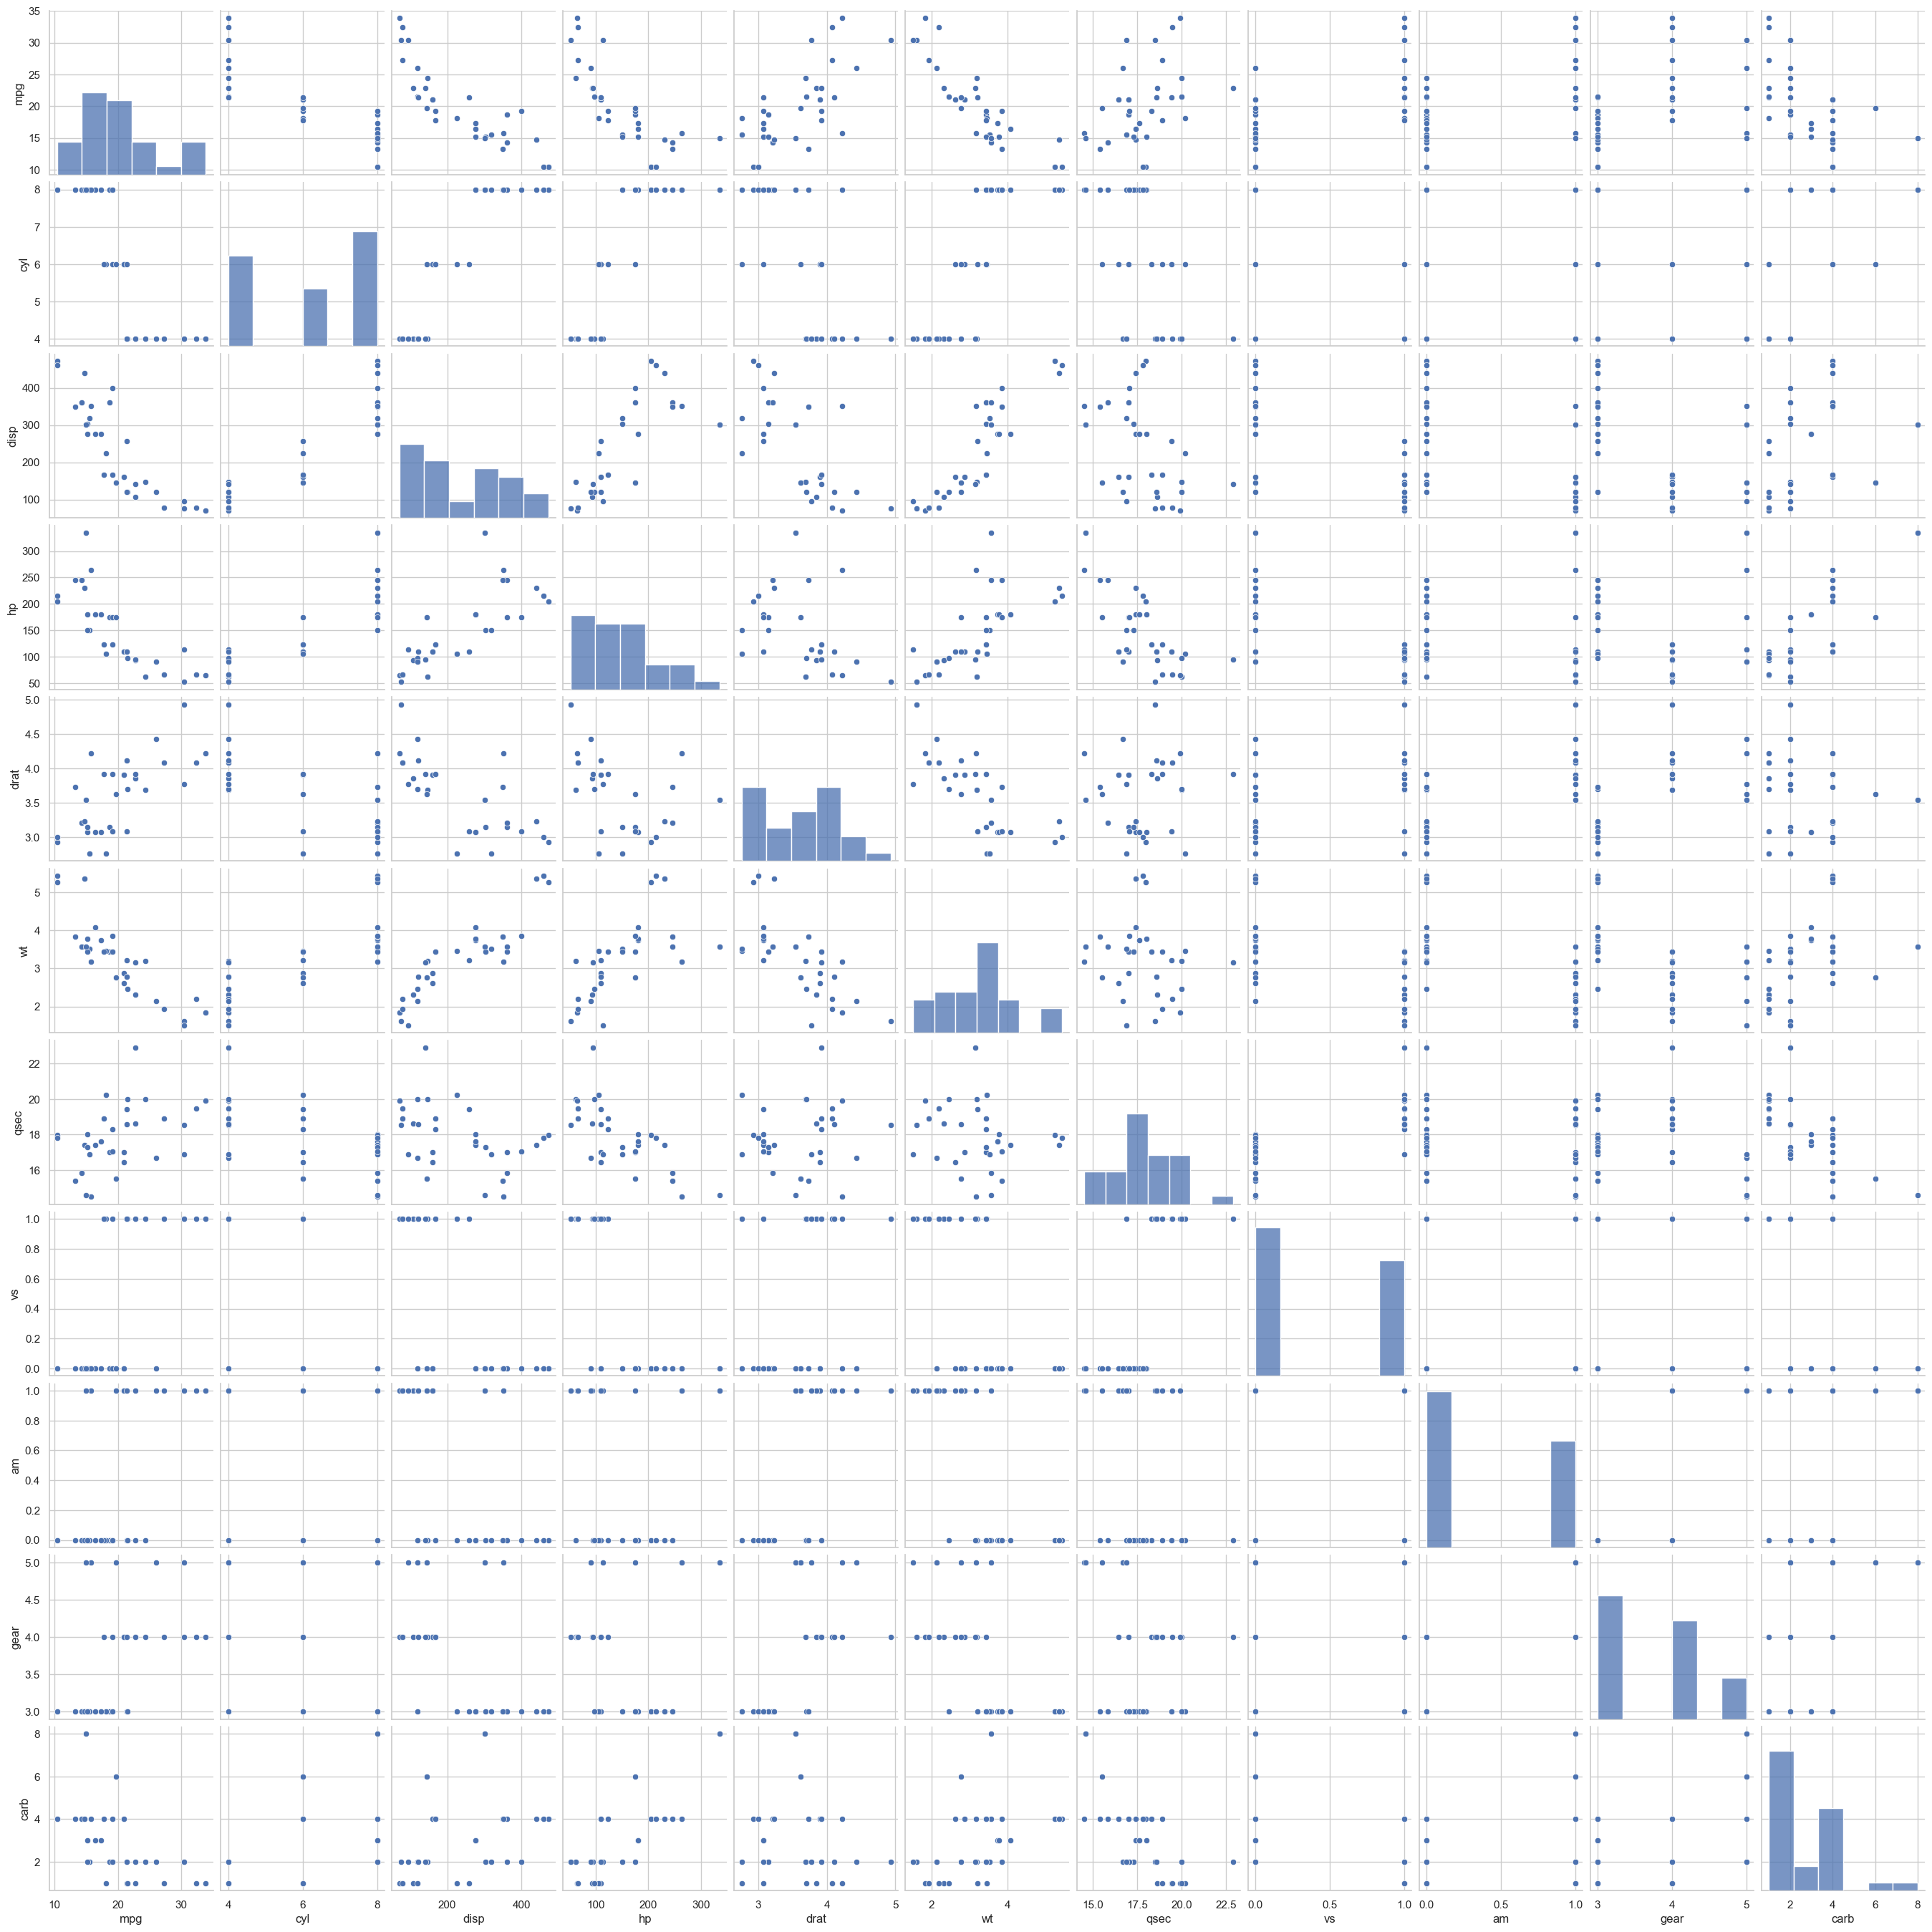

In [60]:
sb.pairplot(cars)

/Users/kaledinaoa/Documents/Projects/DATA-ANALYST/num-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


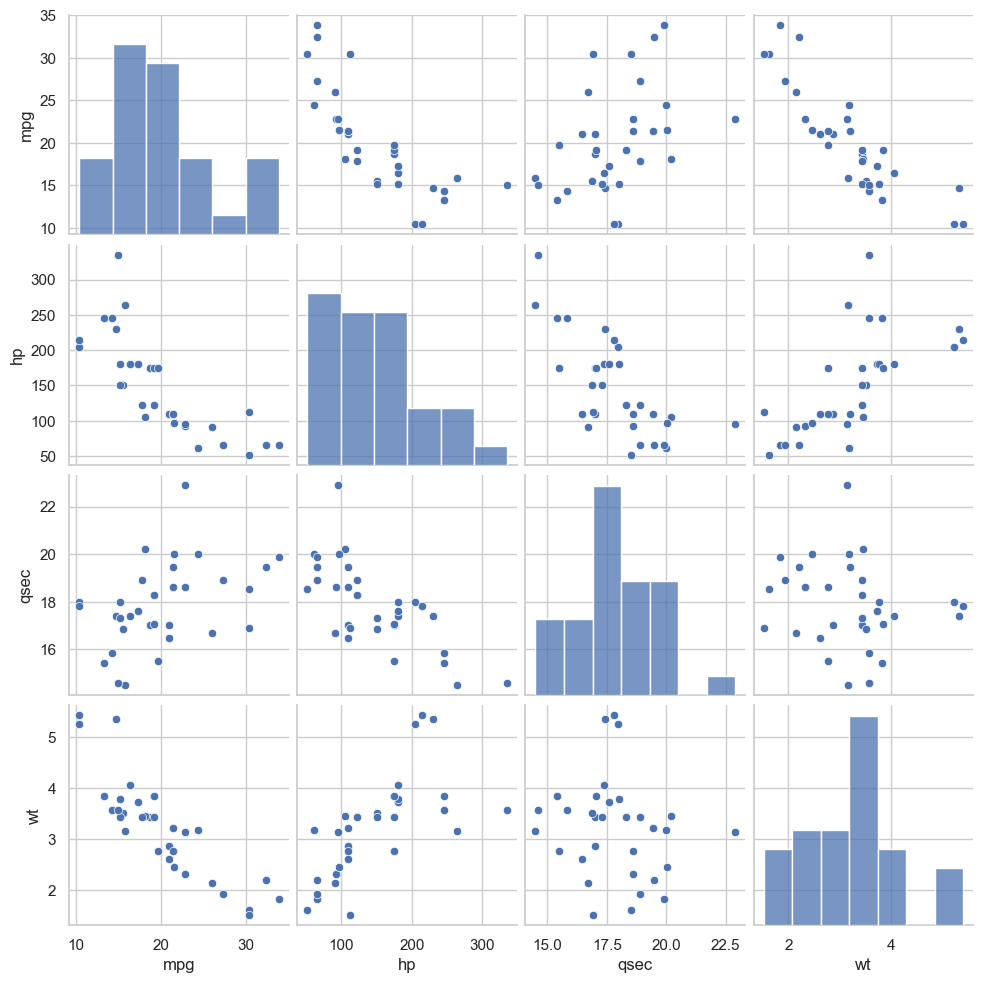

In [61]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

In [63]:
### Using scipy to calculate the Pearson correlation coefficient
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print('(mpg, hp) PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print('(mpg, qsec) PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print('(mpg, wt) PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

(mpg, hp) PeasonR Correlation Coefficient -0.776
(mpg, qsec) PeasonR Correlation Coefficient 0.419
(mpg, wt) PeasonR Correlation Coefficient -0.868


In [64]:
### Using pandas to calculate the Pearson correlation coefficient
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


<Axes: >

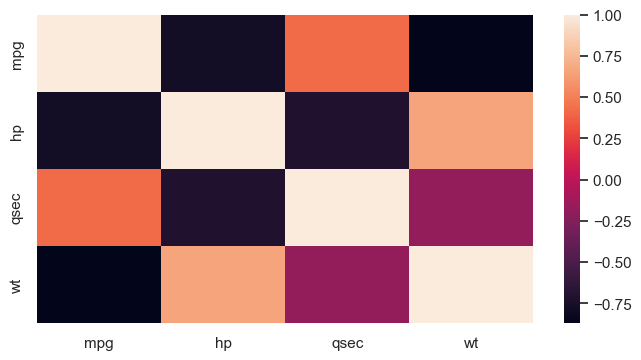

In [65]:
### Using Seaborn to visualize the Pearson correlation coefficient
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels= corr.columns.values)

## Segment 6 - Delving into non-parametric methods using pandas and scipy

In [69]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
car_names,,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3


/Users/kaledinaoa/Documents/Projects/DATA-ANALYST/num-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


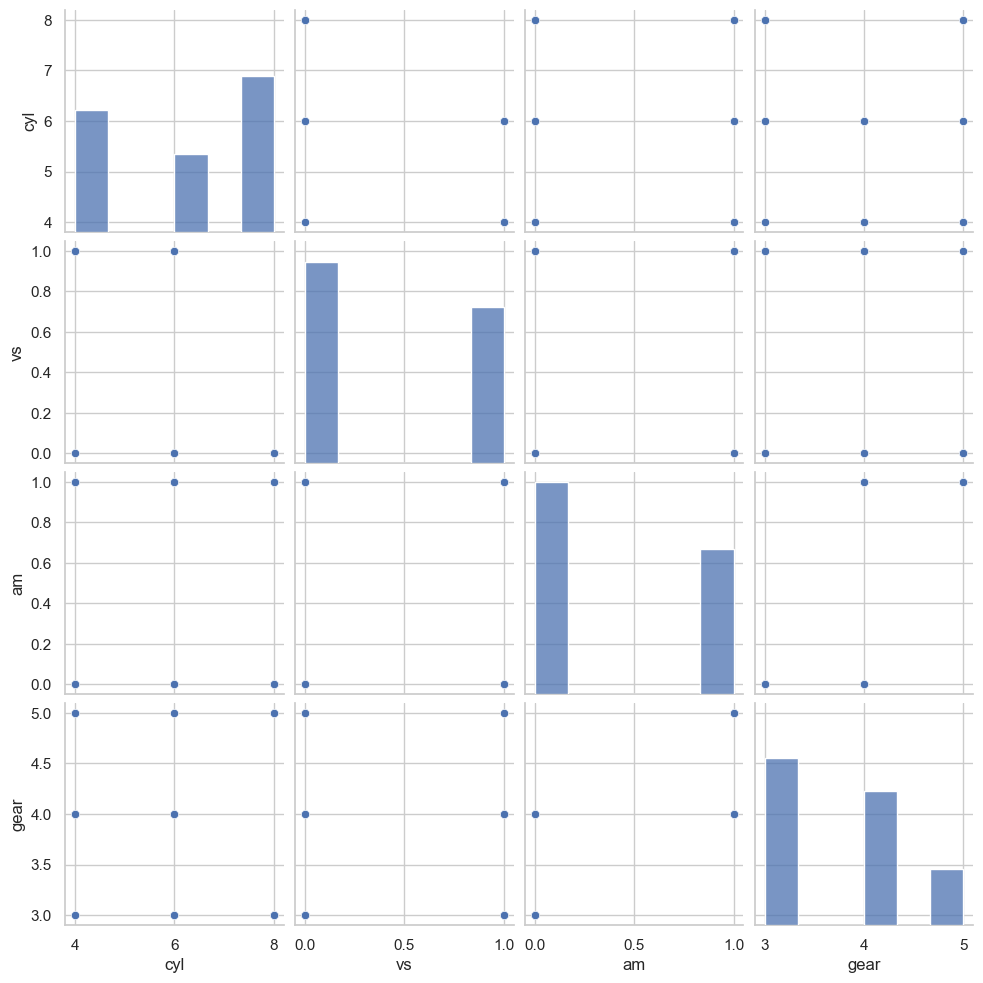

In [71]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

### Коэффициент ранговой корреляции Спирмена : spearmanr_coefficient 

Если spearmanr_coefficient близко к +1, это может означать, что при увеличении значения в переменной cyl, значения в переменной am также увеличиваются, или наоборот, при увеличении cyl значения в am уменьшаются.

Чем меньше p_value, тем более значима корреляция. Если p_value низкое (обычно меньше 0.05), это может указывать на то, что связь между cyl и am статистически значима.

Важно учесть, что коэффициент корреляции Спирмена оценивает только монотонные связи, то есть случаи, когда одна переменная монотонно увеличивается или убывает вместе с другой переменной.


In [72]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print('(cyl, vs) Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

spearmanr_coefficient, p_value = spearmanr(cyl, am)
print('(cyl, am) Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print('(cyl, gear) Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

(cyl, vs) Spearman Rank Correlation Coefficient -0.814
(cyl, am) Spearman Rank Correlation Coefficient -0.522
(cyl, gear) Spearman Rank Correlation Coefficient -0.564


### Chi-square test for independence

Этот код относится к статистическому анализу хи-квадрат (χ²) независимости между категориальными переменными. 

chi2, p, dof, expected = chi2_contingency(table.values)

- chi2: Это переменная, в которой будет сохранена статистика хи-квадрат. Статистика хи-квадрат измеряет разницу между наблюдаемыми и ожидаемыми частотами в таблице сопряженности. Большее значение хи-квадрат может указывать на то, что переменные не независимы.
- p: Это переменная, в которой будет сохранено значение p-значения. P-значение показывает вероятность получить такие или более экстремальные результаты (в данном случае, разницу в таблице сопряженности), если бы между переменными не было никакой связи. Меньшее значение p-значения может указывать на то, что связь между переменными статистически значима.
- dof: Это переменная, в которой будет сохранена степень свободы (degrees of freedom). Степень свободы связана с числом независимых наблюдений и размерностью таблицы сопряженности.
- expected: Это переменная, в которой будут сохранены ожидаемые частоты. Ожидаемые частоты - это частоты, которые мы ожидали бы видеть в таблице, если бы переменные были независимыми.


Все это связано с анализом таблицы сопряженности (кросс-таблицы), которая используется для оценки связи между двумя категориальными переменными. Когда вы применяете chi2_contingency к table.values, вы проводите хи-квадрат тест на независимость между этими переменными. Если p маленькое (обычно меньше 0.05), это может указывать на то, что между переменными есть статистически значимая связь.






In [95]:

from scipy.stats import chi2_contingency

table = pd.crosstab(cyl, am)
print(table)
chi2, p, dof, expected = chi2_contingency(table.values)
print (' \n Chi-square statistic %0.3f, p_value %0.3f, dof %0.3f \n' % (chi2, p, dof))
print(expected)



am    0  1
cyl       
4     3  8
6     4  3
8    12  2
 
 Chi-square statistic 8.741, p_value 0.013, dof 2.000 

[[6.53 4.47]
 [4.16 2.84]
 [8.31 5.69]]


In [99]:
table = pd.crosstab(cyl, vs)
chi2, p, dof, expected = chi2_contingency(table.values)
print (' \n CYL and VS Chi-square statistic %0.3f, p_value %0.3f, dof %0.3f \n' % (chi2, p, dof))

 
 CYL and VS Chi-square statistic 21.340, p_value 0.000, dof 2.000 



## Segment 7 - Transforming dataset distributions

Стандартизация и нормализация - это два различных метода преобразования данных, которые используются в статистике и машинном обучении для обработки и масштабирования переменных. Вот их основные различия:

- Стандартизация (Z-преобразование):

    При стандартизации переменная преобразуется так, чтобы среднее значение стало равным 0, а стандартное отклонение - 1.
    Это полезно, когда важно выровнять данные относительно среднего значения и учесть их разброс в единичных стандартных отклонениях.
    Стандартизация делает данные более интерпретируемыми, так как значения теперь измеряются в стандартных единицах (Z-значения).
    Стандартизация сохраняет форму распределения данных, но изменяет их среднее и стандартное отклонение.

- Нормализация:

    Нормализация преобразует данные так, чтобы они находились в определенном диапазоне, обычно от 0 до 1.
    Это полезно, когда вы хотите убедиться, что все данные находятся в одном и том же масштабе и не доминируют друг друга.
    Нормализация полезна для алгоритмов, чувствительных к масштабу данных, таких как градиентный спуск в машинном обучении.
    Нормализация изменяет диапазон данных, сохраняя их относительные пропорции и расстояния между значениями.
    Оба метода имеют свои преимущества и недостатки, и выбор между ними зависит от контекста и задачи. Например, стандартизация может быть более подходящей, если важна интерпретация значений, а нормализация может быть полезной для обеспечения согласованного масштаба данных в алгоритмах машинного обучения.

Важно помнить, что выбор между стандартизацией и нормализацией зависит от вашей конкретной задачи, алгоритмов, которые вы используете, и природы ваших данных.

In [110]:
%matplotlib inline
rcParams['figure.figsize'] = 3, 2
sb.set_style('whitegrid')

address = 'data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

### Normalizing and transforming features with MinMaxScalar() and fit_transform()

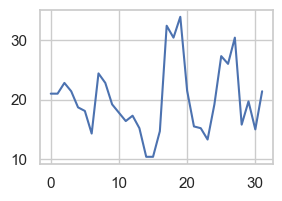

In [111]:
mpg = cars.mpg
plt.plot(mpg)


In [112]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


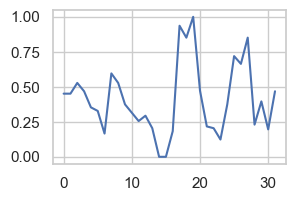

In [113]:
mpg_matrix = mpg.values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

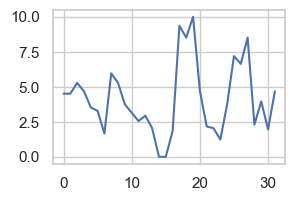

In [114]:
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

### Using scale() to scale your features

5.932029552301218
20.090625000000003
35.188974609374995
33.9
10.4


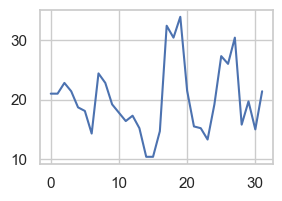

In [130]:
standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)
print(standardized_mpg.std())
print(standardized_mpg.mean())
print(standardized_mpg.var())
print(standardized_mpg.max())
print(standardized_mpg.min())


1.0
-4.996003610813204e-16
1.0000000000000002
2.3279342893096193
-1.6336103713847328


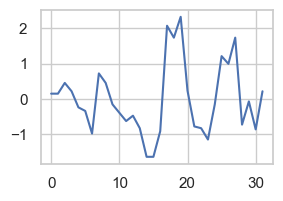

In [131]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)
print(standardized_mpg.std())
print(standardized_mpg.mean())
print(standardized_mpg.var())
print(standardized_mpg.max())
print(standardized_mpg.min())

## Segment 8 - Extreme value analysis using univariate methods

In [135]:
address = 'data/iris.data.csv'
df = pd.read_csv(filepath_or_buffer=address, header=None, sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Identifying outliers from Tukey boxplots

Метод Тьюки (Tukey) для выявления выбросов — это статистический метод, разработанный Джоном Тьюки, который используется для определения и обработки выбросов (аномальных значений) в наборе данных. Выбросы — это значения, которые существенно отличаются от остальных данных в наборе и могут исказить статистические показатели и результаты анализа.

Метод Тьюки для определения выбросов основывается на интерквартильном размахе (IQR) — разнице между первым и третьим квартилями данных. Это меряет разброс данных внутри средних 50% наблюдений. Шаги метода следующие:

- Вычислите первый (Q1) и третий (Q3) квартили данных.
- Вычислите интерквартильный размах (IQR) как разницу между Q3 и Q1: IQR = Q3 - Q1.
- Определите нижнюю и верхнюю границы, за пределами которых значения считаются выбросами:
    - Нижняя граница: Q1 - 1.5 * IQR
    - Верхняя граница: Q3 + 1.5 * IQR
    Любое значение, которое находится за пределами этих границ, считается выбросом.

Выбросы могут быть обработаны разными способами:

- Исключение выбросов из анализа, если они сильно исказят результаты.
- Замена выбросов на ближайшие "допустимые" значения.
- Применение более робастных методов статистического анализа, которые менее подвержены влиянию выбросов.

Метод Тьюки особенно полезен, когда нужно быстро выявить и обработать выбросы в больших наборах данных. Однако он также имеет свои ограничения, и его эффективность может зависеть от природы данных и контекста исследования.

[]

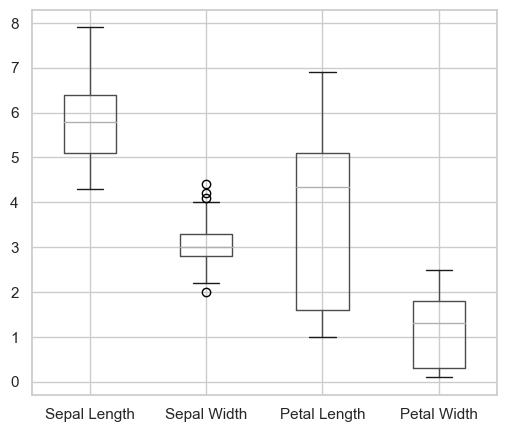

In [137]:
%matplotlib inline
rcParams['figure.figsize'] = 6, 5
sb.set_style('whitegrid')

df.boxplot(return_type='dict')
plt.plot()

In [138]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [139]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width < 2.05)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


### Applying Tukey outlier labeling

In [141]:
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)
print(X_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


## Segment 9 - Multivariate analysis for outlier detection

<Axes: xlabel='Species', ylabel='Sepal Length'>

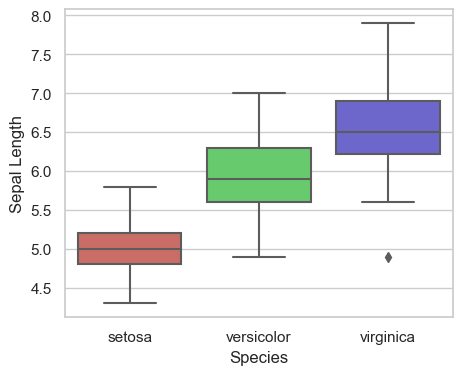

In [148]:
sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

### Looking at the scatterplot matrix

/Users/kaledinaoa/Documents/Projects/DATA-ANALYST/num-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


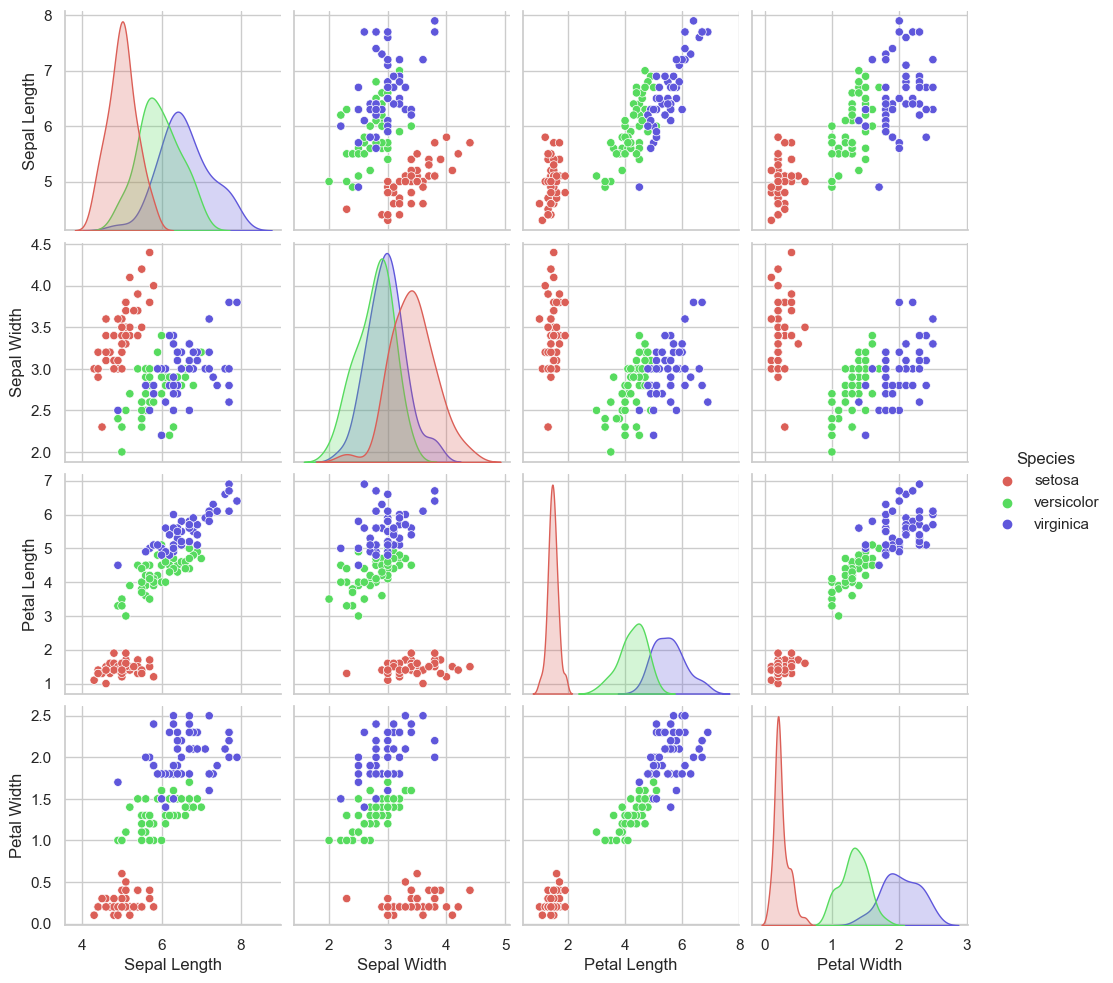

In [146]:
sb.pairplot(df, hue='Species', palette='hls')

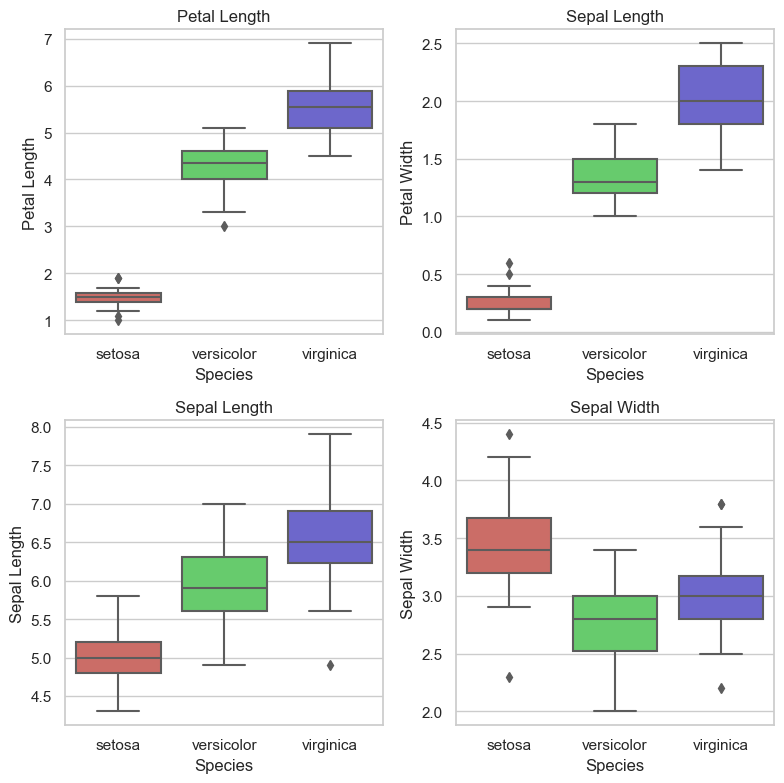

In [188]:
plt.figure(figsize=(8, 8))

plt.subplot(221)  
sb.boxplot(x='Species', y='Petal Length', data=df, palette='hls')
plt.title('Petal Length')

plt.subplot(222)  
sb.boxplot(x='Species', y='Petal Width', data=df, palette='hls')
plt.title('Sepal Length')

plt.subplot(223)  
sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')
plt.title('Sepal Length')

plt.subplot(224)  
sb.boxplot(x='Species', y='Sepal Width', data=df, palette='hls')
plt.title('Sepal Width')

plt.tight_layout()
plt.show()